In [72]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

import random

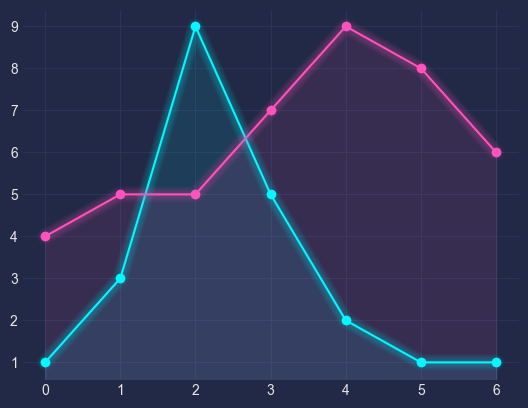

In [5]:
plt.style.use("cyberpunk")

plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='o')

mplcyberpunk.add_glow_effects()

plt.show()

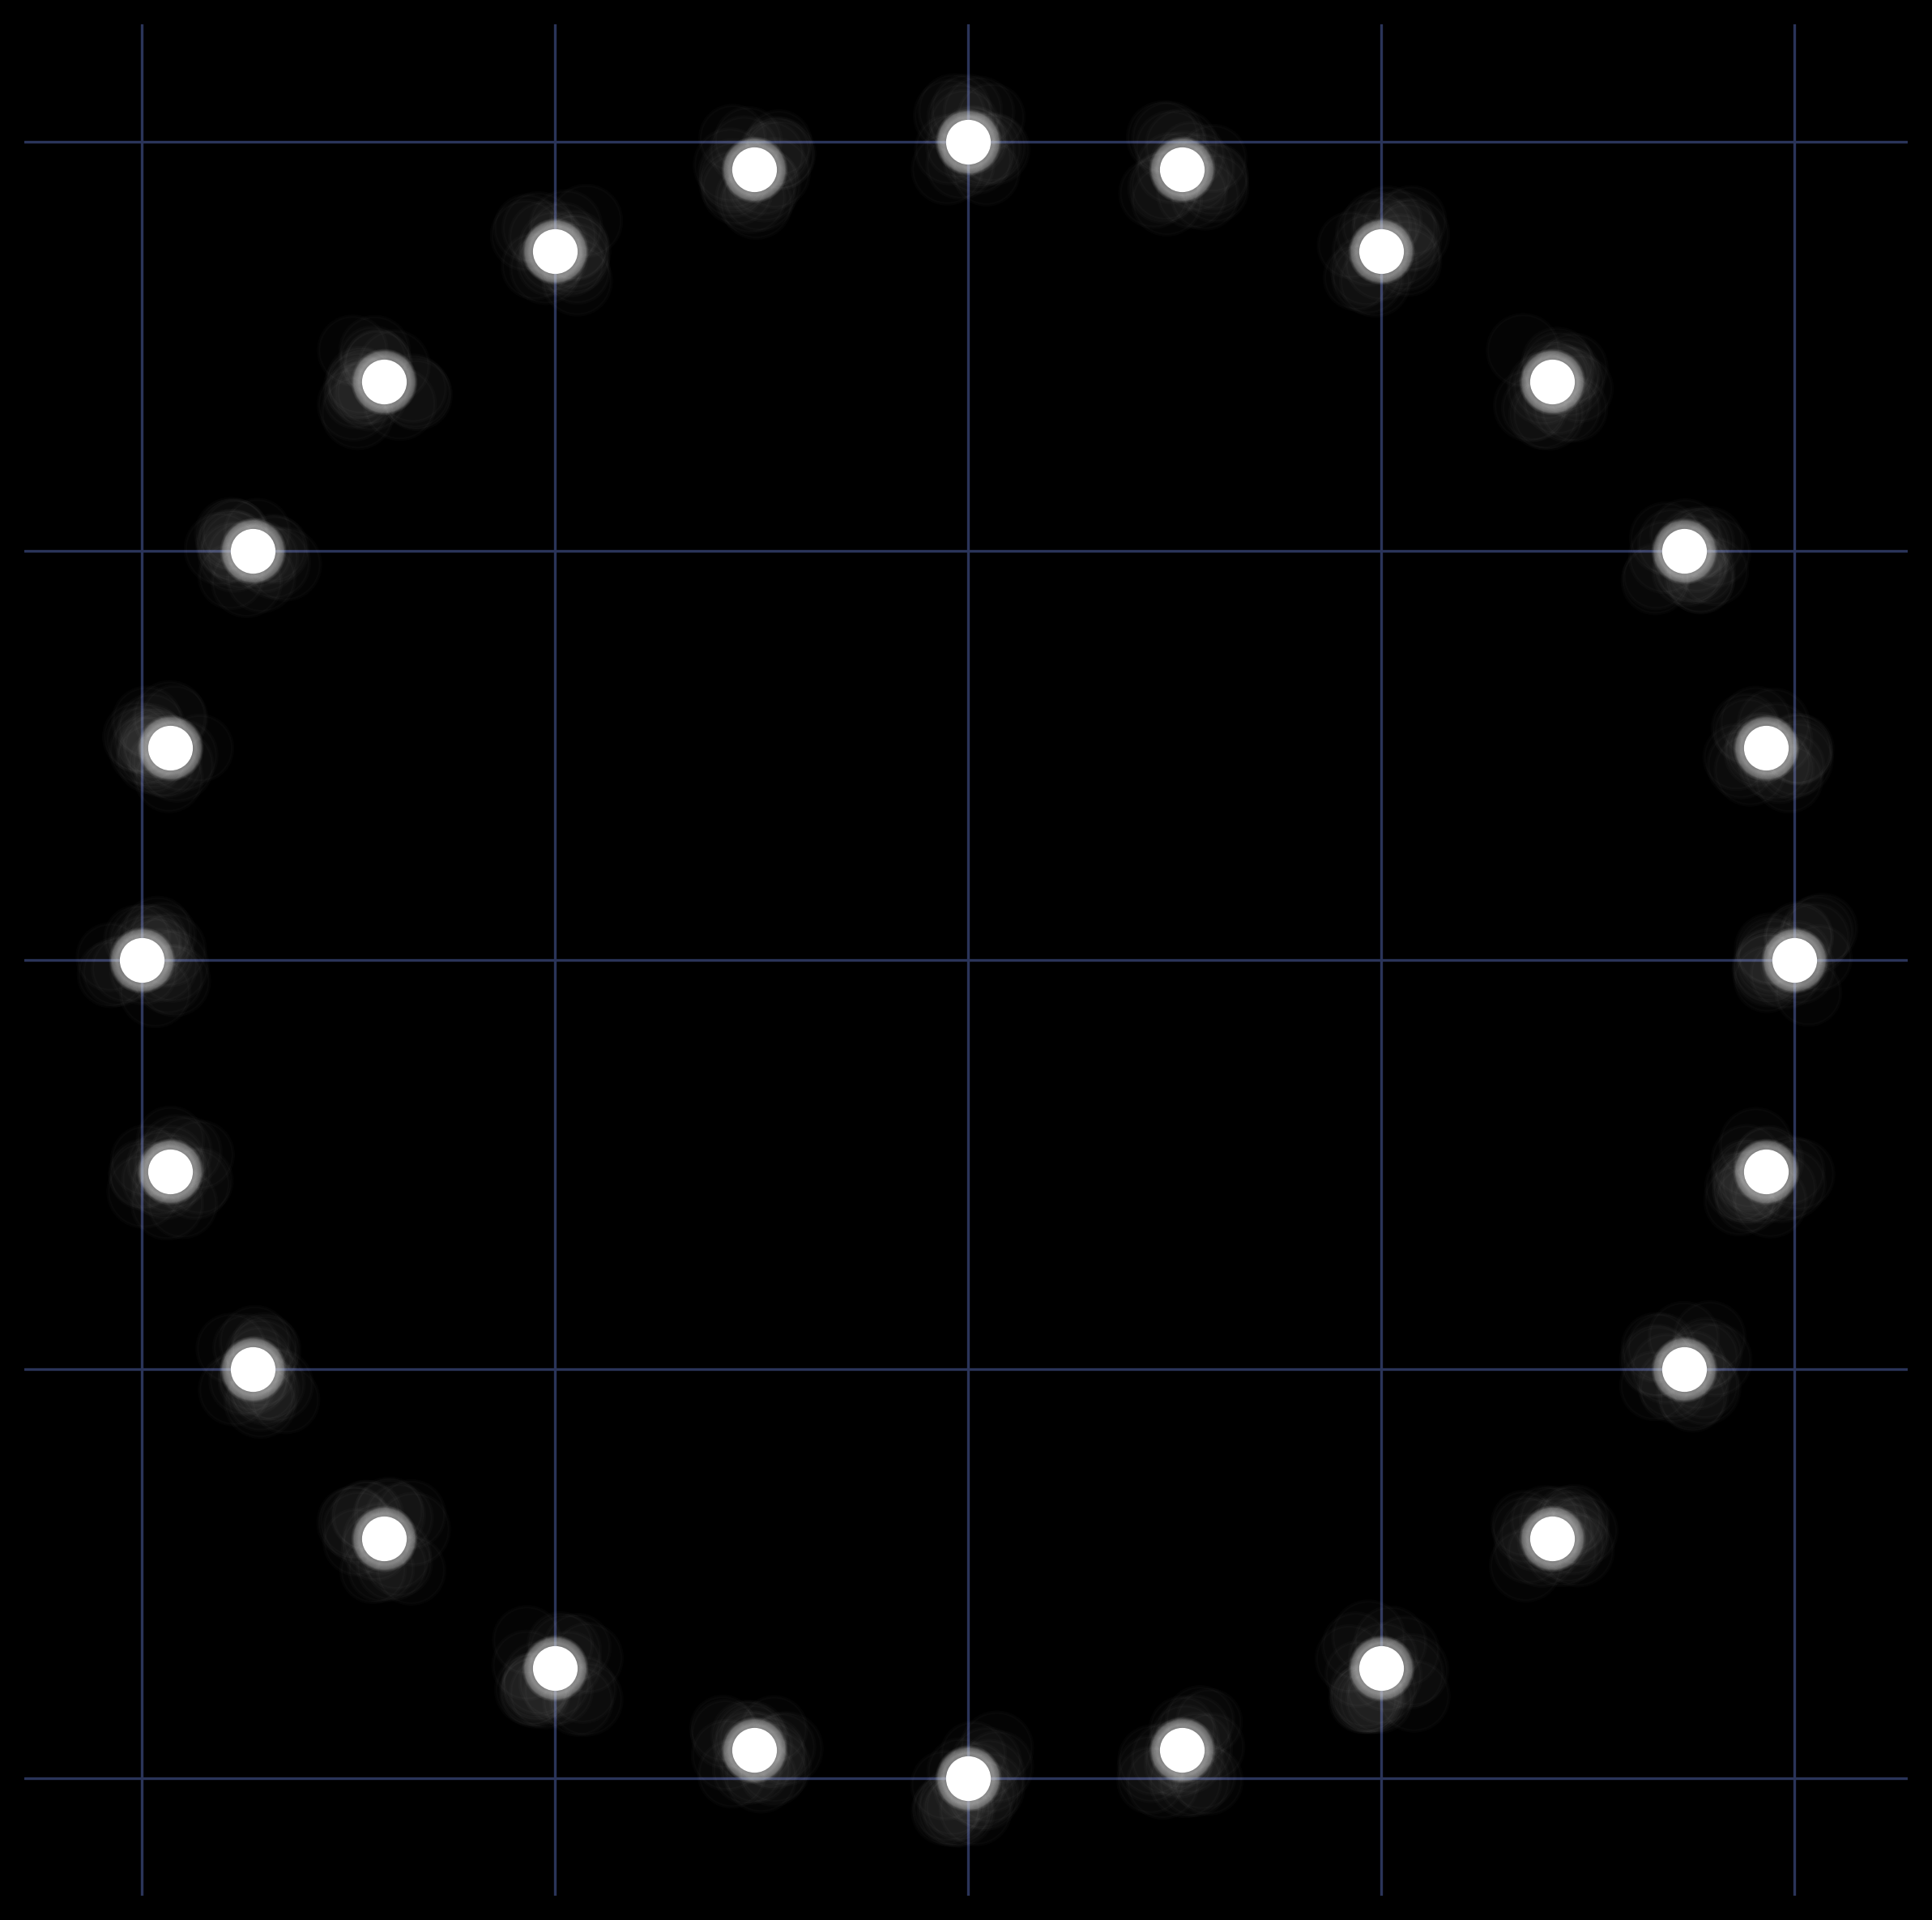

In [97]:
from graph_utils import *

G = nx.cycle_graph(24)
pos = nx.circular_layout(G)

draw_glow_nodes(G,pos)


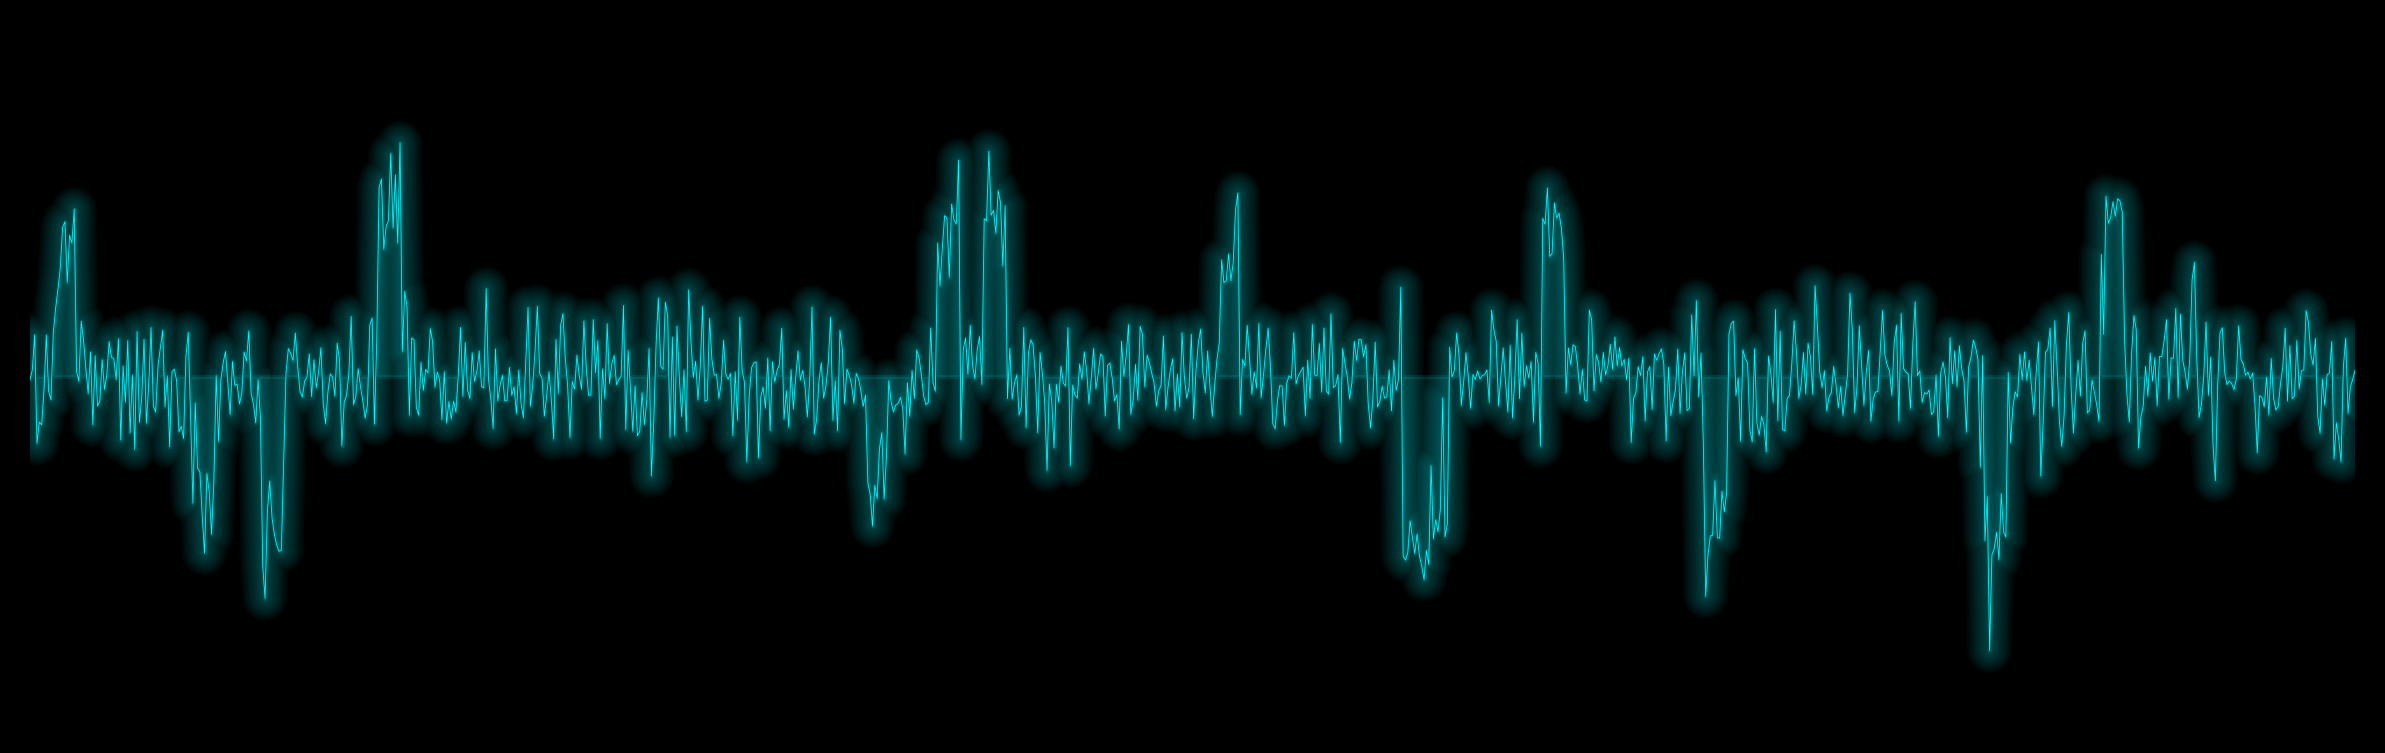

In [125]:
fig, ax = plt.subplots(figsize=(10, 3), dpi=300)
#plot random noise around 1 and 0 


# Define the mask
mask = np.ones(1000)

for i in range(100):

    random_number = random.random()

    if random_number < 0.3:
        # Set 0 for the first 2/4 of the array
        mask[10*i:10*(i+1)] = 1
    else:
        mask[10*i:10*(i+1)] = 0





x = np.linspace(0, 8*np.pi, 1000)
y = np.sin(2*x)*mask + np.random.normal(0, 0.2, 1000)


ax.plot(x, y, linewidth=0.2)


mplcyberpunk.add_glow_effects()
# Turn off axis numbers
plt.xticks([])   # Turn off x-axis numbers
plt.yticks([])   # Turn off y-axis numbers

# Set limits to the axis
plt.xlim(0, 8*np.pi)  # Set x-axis limits
plt.ylim(-2, 2)   # Set y-axis limits

# Turn off the grid
plt.grid(False)

ax.set_facecolor('black')
fig.set_facecolor('black')

plt.show()

plt.savefig('demo.png', transparent=True)




    

